In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Loading files and setting up variables

In [2]:
path = Path.home().joinpath("diaz_rincon/VTA_SNc")
folder_path = "data/gc_ephys001"

In [3]:
full_path = list(Path(path).joinpath(folder_path).iterdir())
full_path

[PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/spks.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/Fneu.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/data.bin'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/ops.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/.ipynb_checkpoints'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/stat.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/data/gc_ephys001/iscell.npy')]

In [4]:
# F = np.load(folder_path + 'F.npy', allow_pickle=True)
Fneu = np.load(full_path[1], allow_pickle=True)
spks = np.load(full_path[0], allow_pickle=True)
stat = np.load(full_path[5], allow_pickle=True)
ops =  np.load(full_path[3], allow_pickle=True)
iscell = np.load(full_path[6], allow_pickle=True)

# Exploring data

Most of the info is contained in the ops variable


In [5]:
ops = ops.item()
ops.keys()

dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass'

In [6]:
stat

array([{'ypix': array([477, 477, 478, 478, 478, 478, 478, 478, 478, 478, 479, 479, 479,
              479, 479, 479, 479, 479, 479, 479, 479, 480, 480, 480, 480, 480,
              480, 480, 480, 480, 480, 480, 480, 481, 481, 481, 481, 481, 481,
              481, 481, 481, 481, 481, 481, 481, 481, 482, 482, 482, 482, 482,
              482, 482, 482, 482, 482, 482, 482, 482, 482, 482, 483, 483, 483,
              483, 483, 483, 483, 483, 483, 483, 483, 483, 483, 483, 483, 483,
              484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484,
              484, 484, 484, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485,
              485, 485, 485, 485, 485, 485, 486, 486, 486, 486, 486, 486, 486,
              486, 486, 486, 486, 486, 486, 486, 486, 486, 487, 487, 487, 487,
              487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 488,
              488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488,
              488, 488, 489, 489, 489, 489,

25


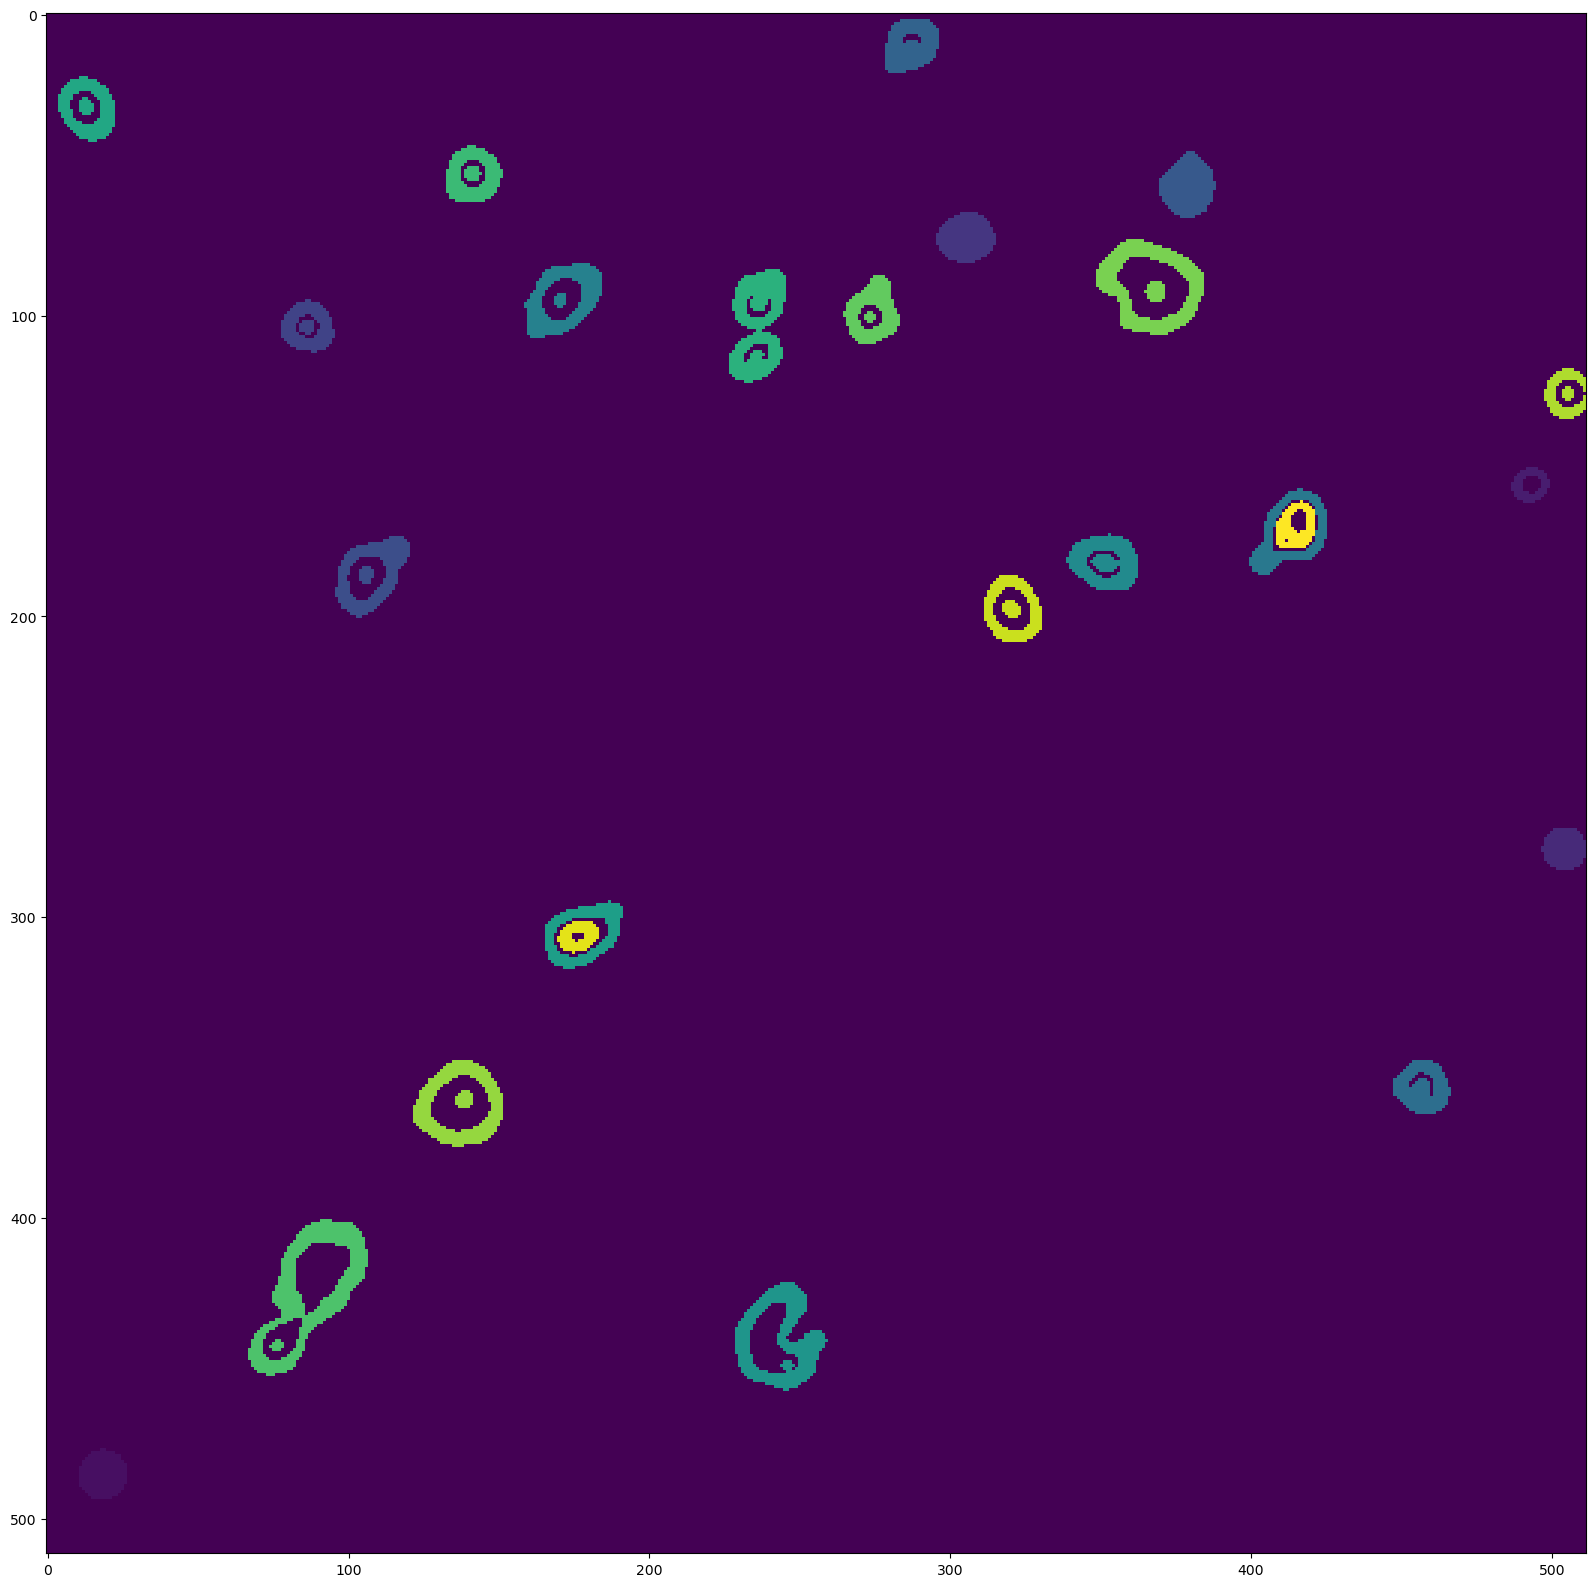

In [7]:
ncells = stat.shape[0] # Total number of cells
print(ncells)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,ncells):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

plt.figure(figsize=(20,20))
plt.imshow(im)
plt.show()